# Image Classification with DNN

## DATASETS:
(a) Carbonic Anhydrase II (ChEMBL205), a protein lyase,  
(b) Cyclin-dependent kinase 2 (CHEMBL301), a protein kinase,  
(c) ether-a-go-go-related gene potassium channel 1 (HERG) (CHEMBL240), a voltage-gated ion channel,  
(d) Dopamine D4 receptor (CHEMBL219), a monoamine GPCR,  
(e) Coagulation factor X (CHEMBL244), a serine protease,  
(f) Cannabinoid CB1 receptor (CHEMBL218), a lipid-like GPCR and  
(g) Cytochrome P450 19A1 (CHEMBL1978), a cytochrome P450.  
The activity classes were selected based on data availability and as representatives of therapeutically important target classes or as anti-targets.

In [1]:
!nvidia-smi

Thu Sep 23 15:09:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:01:00.0  On |                  N/A |
|  0%   43C    P8    19W / 240W |    485MiB /  8116MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%%capture
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [3]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import AllChem

RDKit WARNING: [15:09:51] Enabling RDKit 2019.09.3 jupyter extensions


In [6]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')

In [7]:
list(path.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_512.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl.csv'),
 PosixPath('../dataset/13321_2017_

# Generate images

In [10]:
#DElETE DIRECTORY
#import shutil
#import pathlib
#import os  # for checking results

#print(os.listdir())
# ["a_directory", "foo.py", ...]

#DATA = DATA/'directory'

#shutil.rmtree(DATA)
#print(os.listdir())
# ["foo.py", ...]

In [1]:
datasets = ['CHEMBL205_cl', 'CHEMBL301_cl', 'CHEMBL218_cl', 
            'CHEMBL240_cl', 'CHEMBL219_cl', 
            'CHEMBL244_cl', 'CHEMBL1978_cl']

In [10]:
DATA = path/'mol_images'
DATA.mkdir(exist_ok=True)

In [ ]:
for dataset in datasets:
    
    df = pd.read_csv(path/f'{dataset}.csv')
    IMAGES = DATA/dataset
    if not IMAGES.is_dir():
        IMAGES.mkdir(exist_ok=True)
        for i, r in df.iterrows():
    
            cid = r.CID
            smile = r.SMILES
            mol = Chem.MolFromSmiles(smile)
            Chem.Draw.MolToFile(mol, IMAGES/f'{cid}.png', size = (224, 224), imageType='png')
    

In [ ]:
dataset = 'CHEMBL219_cl'

In [ ]:
IMAGES = DATA/datasets[4]

In [15]:
images = list(IMAGES.glob('*.png'))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

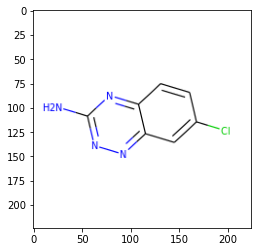

In [16]:

img = mpimg.imread(images[0])
imgplot = plt.imshow(img)
plt.show()